In [5]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from scipy import optimize as op
warnings.simplefilter('ignore')

In [7]:
np.random.seed(42)

In [8]:
iris = pd.read_csv('data\Iris.csv')

In [9]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
# iris = iris[iris.Species != 'Iris-versicolor']

### Visualizations.

Below plot shows the relationship between sepallength and sepalwidth

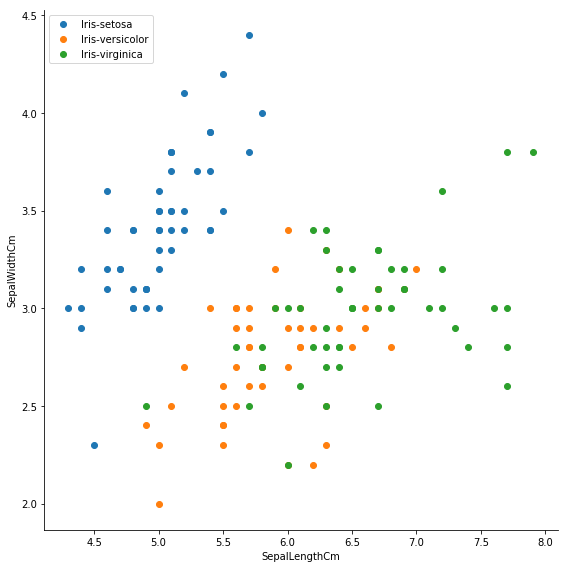

In [11]:
sepallength_sepalwidth = sb.FacetGrid(iris,hue='Species',size=8).map(plt.scatter,'SepalLengthCm','SepalWidthCm')
plt.legend(loc = 'upper left')
plt.show()

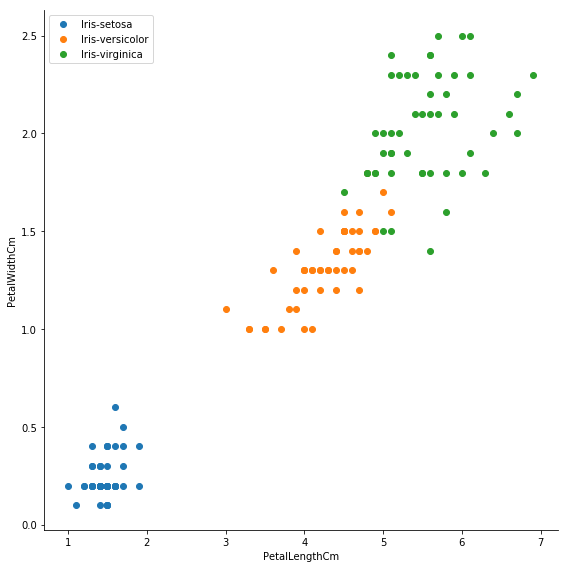

In [12]:
petallength_petalwidth = sb.FacetGrid(iris,hue = 'Species',size=8).map(plt.scatter,'PetalLengthCm','PetalWidthCm')
plt.legend(loc = 'upper left')
plt.show()

First we will try to classify versicolor and non versicolor.

In [13]:
iris.Species = iris.Species.apply(lambda x: 1 if x== 'Iris-versicolor' else 0)

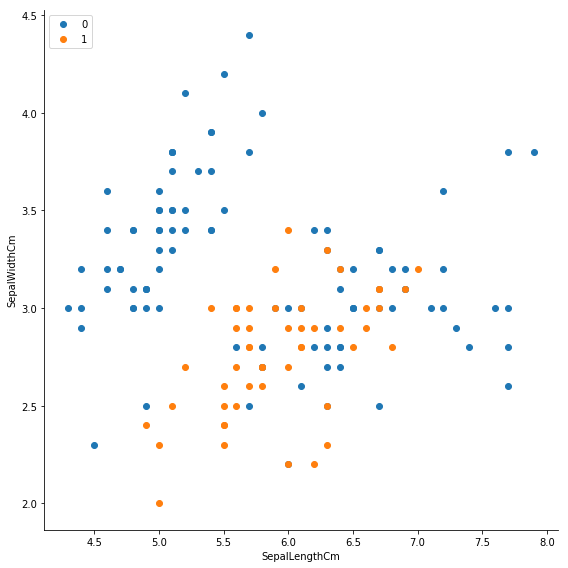

In [14]:
sepallength_sepalwidth = sb.FacetGrid(iris,hue='Species',size=8).map(plt.scatter,'SepalLengthCm','SepalWidthCm')
plt.legend(loc = 'upper left')
plt.show()

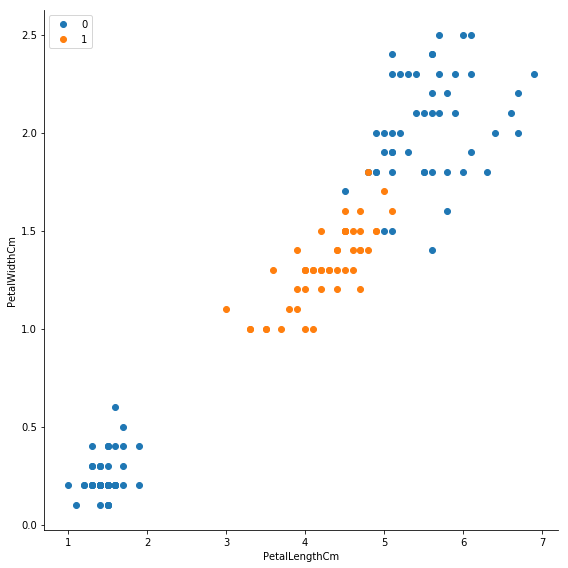

In [15]:
petallength_petalwidth = sb.FacetGrid(iris,hue = 'Species',size=8).map(plt.scatter,'PetalLengthCm','PetalWidthCm')
plt.legend(loc = 'upper left')
plt.show()

In [16]:
X = iris.drop(['Id','Species'],1).values
y = iris.Species.values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify = iris.Species)

In [18]:
iris.Species.value_counts()/len(iris.Species)*100

0    66.666667
1    33.333333
Name: Species, dtype: float64

In [19]:
print('Percentage of Versicolor is {}% & percentage of non Versicolor is {}% in training set'.\
      format(round((sum(y_train)/len(y_train)*100),2),round(100-(sum(y_train)/len(y_train)*100),2)))

Percentage of Versicolor is 33.04% & percentage of non Versicolor is 66.96% in training set


In [20]:
print('Percentage of Versicolor is {}% & percentage of non Versicolor is {}% in testing set'.\
      format(round((sum(y_test)/len(y_test)*100),2),round(100-(sum(y_test)/len(y_test)*100),2)))

Percentage of Versicolor is 34.21% & percentage of non Versicolor is 65.79% in testing set


Adding intercept term to input features of training and testing set.

In [21]:
x_train = np.c_[np.ones((x_train.shape[0],1)),x_train]
x_test = np.c_[np.ones((x_test.shape[0],1)),x_test]

In [22]:
y_train = y_train[:,np.newaxis]

Initializing coefficients for all input features.

In [23]:
theta = np.zeros(x_train.shape[1])

In [24]:
theta = theta.reshape(-1,1)

Defining Logistic function.

In [25]:
def sigmoid(t):
    return 1.0/(1+np.exp(-t))

Defining logistic regression cost function (Log loss)

In [26]:
def lossfunction(theta,x,y):
    p_hat = sigmoid(x.dot(theta))
    loss = (-y*np.log(p_hat)-(1-y)*np.log(1-p_hat)).mean()
    return loss

Defining gradient function.

In [27]:
def gradient(theta,x,y):
    p_hat = sigmoid(x.dot(theta))
    gradient = (np.dot(x.T,(p_hat-y)))/len(y)
    return(gradient)

To find the optimal set of coeffs we will use minimize function from scipy.

In [28]:
from scipy import optimize as op

In [29]:
coeffs = op.minimize(fun=lossfunction,x0=theta,args=(x_train,y_train.flatten()),method='Newton-CG',jac=gradient)

In [30]:
coeffs = coeffs.x.reshape(-1,1)

In [31]:
coeffs

array([[ 7.17905549],
       [-0.45419023],
       [-2.60040531],
       [ 1.62383554],
       [-3.12498531]])

Prediction on test data.

In [32]:
y_hat = sigmoid(x_test.dot(coeffs))

In [33]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix

setting threshold value.

In [34]:
t = 0.4

In [35]:
y_hat = np.array([1 if i>=t else 0 for i in y_hat])

In [36]:
print('Accuracy score {}'.format(accuracy_score(y_test,y_hat)))
print('Precision score {}'.format(precision_score(y_test,y_hat)))
print('Recall score {}'.format(recall_score(y_test,y_hat)))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_hat))

Accuracy score 0.7105263157894737
Precision score 0.5714285714285714
Recall score 0.6153846153846154


Confusion Matrix
[[19  6]
 [ 5  8]]
